<a href="https://colab.research.google.com/github/maulindu8322/tensorflow/blob/master/DL_Projects/2_Movie_review_Sentiment_Binary_Classification(14July%2C2020).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [73]:
from tensorflow import keras

In [74]:
from keras.datasets import imdb

In [75]:
(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=10000)

In [ ]:
max(max(i) for i in train_data)

In [ ]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(val,key) for (key,val) in word_index.items()]
)

In [ ]:
x = 8322
original_review = train_data[x]

decoded_review = ' '.join(
    [reverse_word_index.get(i-3,'?') for i in original_review]
)

print(decoded_review)

In [ ]:
original_label = train_labels[x]

if original_label == 1 :
  rev = 'Positive Review'
elif original_label == 0 :
  rev = 'Negetive Review'

print('This is actually : ',rev)

#### Vectorize training data

One-hot encode your lists to turn them into vectors of 0s and 1s. This would
mean, for instance, turning the sequence [3, 5] into a 10,000-dimensional vector that would be all 0s except for indices 3 and 5, which would be 1s. Then you
could use as the first layer in your network a Dense layer, capable of handling
floating-point vector data

In [ ]:
def vectorize_data(sequence,dimension=10000) :
  result = np.zeros((len(sequence),dimension))
  for i,seq in enumerate(sequence) :
    result[i, seq] = 1
  return result

In [ ]:
x_train = vectorize_data(train_data)
x_test = vectorize_data(test_data)

In [ ]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [71]:
network = keras.Sequential([
                            keras.layers.Flatten(),
                            keras.layers.Dense(16, activation=tf.nn.relu),
                            keras.layers.Dense(16, activation=tf.nn.relu),
                            keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

In [77]:
network.compile(optimizer=tf.optimizers.RMSprop(learning_rate=0.001), loss=tf.losses.binary_crossentropy, metrics=tf.metrics.binary_accuracy)

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

<b>The validation split </b>variable in Keras is a value between [0..1]. Keras proportionally split your training set by the value of the variable. The first set is used for training and the 2nd set for validation after each epoch.

In [ ]:
training_history = network.fit(partial_x_train, partial_y_train, batch_size=512, epochs=20, validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 2s 68ms/step - loss: 0.4969 - binary_accuracy: 0.7989 - val_loss: 0.3976 - val_binary_accuracy: 0.8589
Epoch 2/20
30/30 [==============================] - 2s 60ms/step - loss: 0.3166 - binary_accuracy: 0.9023 - val_loss: 0.3227 - val_binary_accuracy: 0.8814
Epoch 3/20
30/30 [==============================] - 1s 38ms/step - loss: 0.2450 - binary_accuracy: 0.9263 - val_loss: 0.2936 - val_binary_accuracy: 0.8871
Epoch 4/20
30/30 [==============================] - 2s 61ms/step - loss: 0.2029 - binary_accuracy: 0.9352 - val_loss: 0.2778 - val_binary_accuracy: 0.8905
Epoch 5/20
30/30 [==============================] - 2s 61ms/step - loss: 0.1721 - binary_accuracy: 0.9488 - val_loss: 0.2773 - val_binary_accuracy: 0.8884
Epoch 6/20
30/30 [==============================] - 1s 46ms/step - loss: 0.1494 - binary_accuracy: 0.9566 - val_loss: 0.2748 - val_binary_accuracy: 0.8901
Epoch 7/20
30/30 [==============================] - 1s 39ms/step - los

The call to model.fit() returns a History object. This object has a member history, which is a dictionary containing data about everything that happened during training. 

In [ ]:
history_dict = training_history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

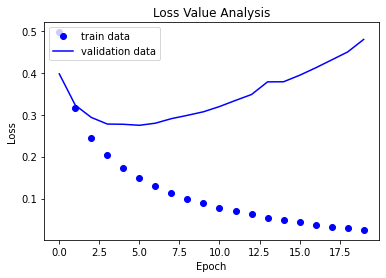

In [ ]:
loss_values = history_dict['loss']
validation_loss_values = history_dict['val_loss']
plt.plot(loss_values,'bo')
plt.plot(validation_loss_values,'b')
plt.title('Loss Value Analysis')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train data', 'validation data'], loc='upper left')
plt.show()

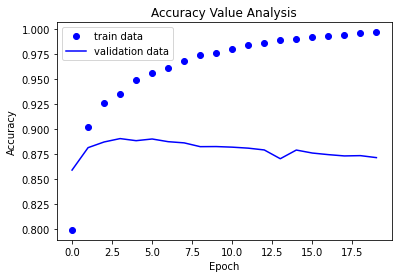

In [ ]:
binary_accuracy_values = history_dict['binary_accuracy']
val_binary_accuracy_values = history_dict['val_binary_accuracy']
plt.plot(binary_accuracy_values,'bo')
plt.plot(val_binary_accuracy_values,'b')
plt.title('Accuracy Value Analysis')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train data', 'validation data'], loc='upper left')
plt.show()

As you can see, the training loss decreases with every epoch, and the training accuracy
increases with every epoch. That’s what you would expect when running gradientdescent optimization—the quantity you’re trying to minimize should be less with
every iteration. But that isn’t the case for the validation loss and accuracy: they seem to
peak at the fourth epoch. This is an example of a
model that performs better on the training data isn’t necessarily a model that will do
better on data it has never seen before. In precise terms, what you’re seeing is overfitting: after the second epoch, you’re overoptimizing on the training data, and you end
up learning representations that are specific to the training data and don’t generalize
to data outside of the training set.
In this case, to prevent overfitting, you could stop training after three epochs. In
general, you can use a range of techniques to mitigate overfitting .

Let’s train a new network from scratch for four epochs and then evaluate it on the
test data.

In [ ]:
training_history = network.fit(partial_x_train, partial_y_train, batch_size=512, epochs=4, validation_data=(x_val,y_val))

Epoch 1/4
30/30 [==============================] - 1s 38ms/step - loss: 0.0042 - binary_accuracy: 0.9999 - val_loss: 0.7522 - val_binary_accuracy: 0.8621
Epoch 2/4
30/30 [==============================] - 1s 37ms/step - loss: 0.0036 - binary_accuracy: 0.9999 - val_loss: 0.7719 - val_binary_accuracy: 0.8618
Epoch 3/4
30/30 [==============================] - 1s 36ms/step - loss: 0.0030 - binary_accuracy: 0.9999 - val_loss: 0.8023 - val_binary_accuracy: 0.8608
Epoch 4/4
30/30 [==============================] - 1s 39ms/step - loss: 0.0026 - binary_accuracy: 0.9999 - val_loss: 0.8345 - val_binary_accuracy: 0.8576


In [ ]:
history_dict = training_history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

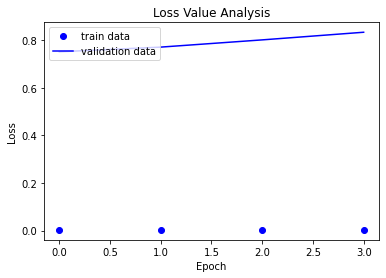

In [ ]:
loss_values = history_dict['loss']
validation_loss_values = history_dict['val_loss']
plt.plot(loss_values,'bo')
plt.plot(validation_loss_values,'b')
plt.title('Loss Value Analysis')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train data', 'validation data'], loc='upper left')
plt.show()

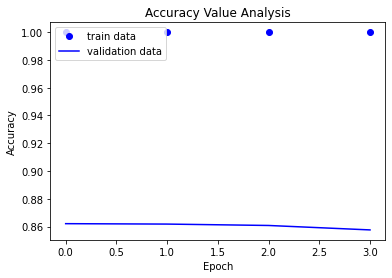

In [ ]:
binary_accuracy_values = history_dict['binary_accuracy']
val_binary_accuracy_values = history_dict['val_binary_accuracy']
plt.plot(binary_accuracy_values,'bo')
plt.plot(val_binary_accuracy_values,'b')
plt.title('Accuracy Value Analysis')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train data', 'validation data'], loc='upper left')
plt.show()

So now we are confident about getting an appropriate result by using 4 epochs, in this case . Now we will train this network for the whole training set, now no need of validation sets, and the above process is just for illustration, only the loss and accuracy analysis for once is enough.

In [78]:
network.fit(x_train, y_train, batch_size=512, epochs=4)

Epoch 1/4
49/49 [==============================] - 1s 24ms/step - loss: 0.4434 - binary_accuracy: 0.8198
Epoch 2/4
49/49 [==============================] - 1s 24ms/step - loss: 0.2531 - binary_accuracy: 0.9106
Epoch 3/4
49/49 [==============================] - 1s 24ms/step - loss: 0.1973 - binary_accuracy: 0.9276
Epoch 4/4
49/49 [==============================] - 1s 24ms/step - loss: 0.1641 - binary_accuracy: 0.9419


In [79]:
test_evaluation = network.evaluate(x_test,y_test)

782/782 [==============================] - 1s 2ms/step - loss: 0.2960 - binary_accuracy: 0.8842


In [80]:
test_evaluation

[0.2959746718406677, 0.8841999769210815]

This fairly naive approach achieves an accuracy of 88%. With state-of-the-art
approaches, you should be able to get close to 95%

In [81]:
prediction = network.predict(x_test)

In [85]:
k = 0
original_test_review = test_data[k]

decoded_test_review = ' '.join(
    [reverse_word_index.get(i-3,'?') for i in original_test_review]
)

print(decoded_test_review)

? please give this one a miss br br ? ? and the rest of the cast rendered terrible performances the show is flat flat flat br br i don't know how michael madison could have allowed this one on his plate he almost seemed to know this wasn't going to work out and his performance was quite ? so all you madison fans give this a miss


In [86]:
original_test_label = test_labels[k]

if original_test_label == 1 :
  r = 'Positive Review'
elif original_test_label == 0 :
  r = 'Negetive Review'

print('This test label is actually : ',r)

This test label is actually :  Negetive Review


In [87]:
predicted_test_label = np.argmax(prediction[k])
if predicted_test_label == 1 :
  revtest = 'Positive Review'
elif predicted_test_label == 0 :
  revtest = 'Negetive Review'

print('I predict this is a : ',revtest)

I predict this is a :  Negetive Review
